In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('datasets/clusters.csv')

data.sample(10)

,A,B,C
952,2.155328,1.064262,1.016723
188,3.397283,3.205068,2.486975
853,0.898930,1.000612,1.249023
276,3.294377,2.504388,2.492125
204,0.415845,1.060233,-0.422951
436,-0.475904,-0.042287,0.280806
489,0.748183,0.866735,0.601649
847,3.632783,1.969702,3.795009
945,0.482142,0.351159,-0.328426
157,1.684599,2.360298,1.927161


In [2]:
data.describe()

,A,B,C
count,1000.000000,1000.000000,1000.000000
mean,1.513081,1.520776,1.498351
std,1.250841,1.247587,1.267040
min,-1.649121,-1.631006,-1.921651
25%,0.542161,0.561720,0.483172
50%,1.520402,1.526202,1.466841
75%,2.483222,2.505169,2.485410
max,4.497581,4.442727,4.678731


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaled_data = MinMaxScaler().fit_transform(data)

pca = PCA(n_components=2).fit(scaled_data)
features_2d = pca.transform(scaled_data)
features_2d[0:5]

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       [-0.46052216,  0.11460533],
       [ 0.44134723, -0.16034683]])

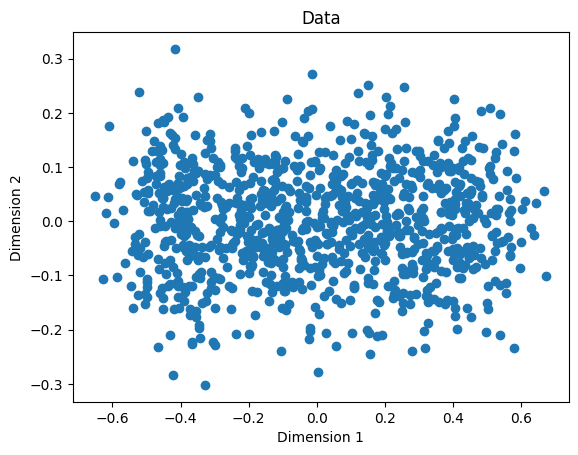

In [4]:
plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

Text(0, 0.5, 'WCSS')

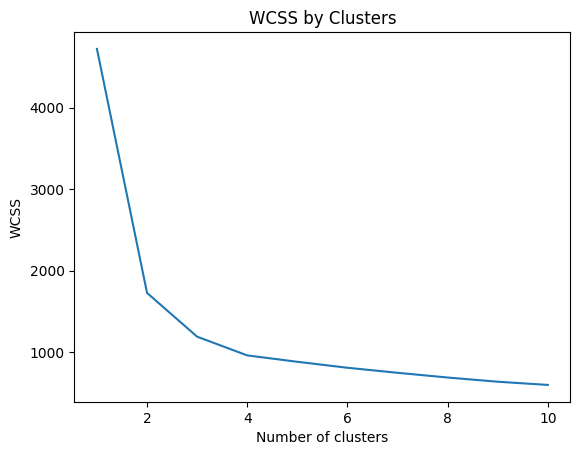

In [5]:
from sklearn.cluster import KMeans
# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(data)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [6]:
model = KMeans(n_clusters=4,init='k-means++',n_init=100,max_iter=1000)
km_clusters = model.fit_predict(data.values)
km_clusters

array([2, 2, 3, 3, 2, 2, 3, 1, 2, 2, 3, 0, 0, 1, 1, 1, 3, 0, 1, 1, 2, 1,
       2, 2, 1, 0, 3, 2, 0, 1, 0, 2, 3, 1, 1, 2, 1, 1, 2, 1, 1, 1, 3, 0,
       3, 2, 2, 3, 3, 1, 2, 0, 3, 3, 3, 3, 1, 2, 3, 2, 2, 2, 2, 2, 1, 1,
       0, 1, 0, 3, 0, 1, 1, 3, 0, 1, 1, 1, 2, 0, 1, 0, 3, 0, 1, 3, 0, 1,
       1, 0, 0, 0, 3, 1, 0, 1, 3, 1, 3, 0, 1, 0, 3, 0, 1, 0, 3, 1, 1, 3,
       1, 0, 2, 2, 0, 3, 0, 3, 2, 0, 1, 0, 3, 3, 2, 1, 0, 1, 3, 2, 0, 0,
       0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 2, 1,
       2, 0, 2, 1, 1, 1, 0, 2, 3, 3, 1, 0, 0, 2, 2, 3, 2, 0, 1, 3, 1, 0,
       0, 1, 1, 2, 1, 2, 0, 0, 1, 3, 2, 3, 3, 0, 0, 2, 0, 1, 3, 0, 1, 1,
       2, 3, 0, 3, 3, 3, 2, 2, 3, 1, 3, 2, 3, 3, 0, 2, 3, 1, 1, 3, 2, 3,
       1, 2, 0, 3, 0, 1, 0, 2, 0, 2, 1, 2, 0, 1, 2, 3, 3, 2, 3, 0, 3, 0,
       3, 1, 1, 0, 3, 2, 2, 1, 3, 1, 0, 0, 3, 3, 3, 2, 3, 2, 1, 3, 3, 1,
       2, 1, 0, 0, 0, 1, 3, 2, 1, 0, 2, 0, 3, 1, 1, 2, 3, 3, 0, 2, 2, 3,
       3, 0, 3, 2, 2, 0, 2, 3, 3, 3, 1, 1, 0, 2, 3,

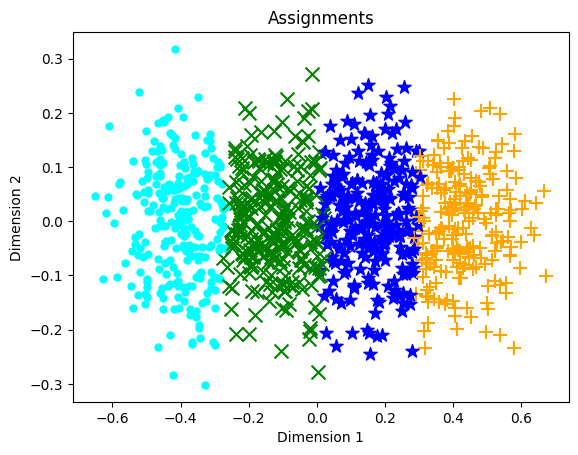

In [7]:

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange',3:'cyan'}
    mrk_dic = {0:'*',1:'x',2:'+',3:'.'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

In [8]:
from sklearn.cluster import AgglomerativeClustering


agg_model = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg_model.fit_predict(data.values)
agg_clusters

array([1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 0, 3, 3, 2, 0, 2, 2, 3, 3, 2, 1, 2,
       1, 1, 2, 1, 0, 1, 1, 2, 3, 1, 0, 2, 2, 1, 3, 2, 1, 3, 2, 2, 0, 3,
       0, 1, 1, 0, 0, 2, 1, 3, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 3, 2, 1, 2, 2, 3, 0, 3, 2, 0, 3, 2,
       2, 3, 3, 3, 2, 2, 3, 2, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 0,
       2, 3, 1, 1, 3, 0, 3, 0, 1, 3, 2, 3, 0, 2, 1, 2, 3, 2, 0, 1, 3, 3,
       2, 2, 3, 3, 2, 1, 2, 3, 1, 3, 2, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2,
       1, 3, 1, 2, 2, 2, 1, 1, 0, 0, 2, 3, 3, 1, 1, 0, 1, 3, 2, 0, 2, 1,
       3, 2, 3, 1, 2, 1, 2, 3, 3, 0, 1, 2, 0, 3, 3, 1, 3, 2, 0, 3, 2, 2,
       1, 0, 3, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 3, 1, 0, 3, 2, 0, 1, 0,
       2, 1, 1, 0, 3, 2, 3, 1, 3, 1, 2, 1, 3, 2, 1, 0, 0, 1, 2, 3, 2, 3,
       0, 2, 2, 1, 0, 1, 1, 3, 0, 2, 3, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2,
       1, 2, 3, 1, 3, 2, 0, 1, 2, 3, 1, 3, 0, 2, 2, 1, 0, 0, 3, 1, 1, 0,
       0, 3, 0, 1, 1, 3, 1, 2, 0, 0, 2, 2, 3, 1, 2,

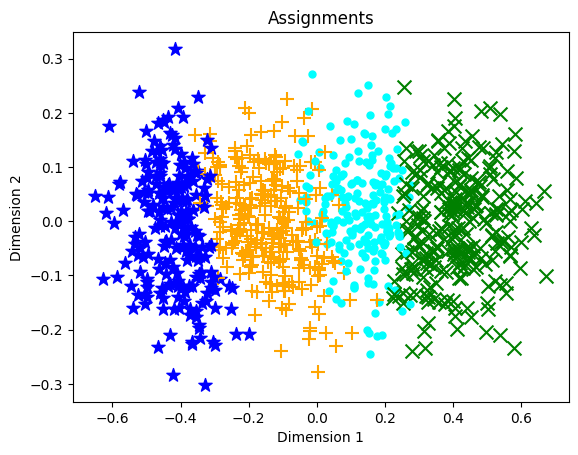

In [9]:
plot_clusters(features_2d,agg_clusters)